# Regression 

In [9]:
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
RANDOM_SEED = 32
LABELS = ["Normal", "Delay"]
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import seaborn as sns

In [10]:
df=pd.DataFrame()
df=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/FINAL.csv")
df

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,ArrTime,...,pressure_y,cloudcover_y,DewPointF_y,WindGustMiles_y,tempF_y,WindChillF_y,humidity_y,Date,Airport_x,Airport_y
0,3.0,2017.0,8.0,25.0,1000.0,0.0,1015.0,11292.0,11057.0,1500.0,...,1018.0,0.0,43.0,9.0,62.0,63.0,49.0,2017-08-25,CLT,DEN
1,3.0,2017.0,8.0,25.0,1600.0,0.0,1615.0,11618.0,13204.0,1800.0,...,1016.0,93.0,67.0,14.0,88.0,87.0,51.0,2017-08-25,MCO,EWR
2,3.0,2017.0,8.0,25.0,1900.0,0.0,1944.0,14771.0,12889.0,2100.0,...,1012.0,70.0,54.0,12.0,63.0,62.0,78.0,2017-08-25,LAS,SFO
3,3.0,2017.0,8.0,25.0,1600.0,0.0,1625.0,11298.0,14771.0,1700.0,...,1015.0,56.0,67.0,11.0,89.0,90.0,34.0,2017-08-25,SFO,DFW
4,3.0,2017.0,8.0,25.0,1100.0,1.0,1040.0,14771.0,10397.0,1900.0,...,1014.0,73.0,55.0,8.0,62.0,62.0,79.0,2017-08-25,ATL,SFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850155,2.0,2016.0,5.0,20.0,1100.0,0.0,1130.0,14747.0,11292.0,1500.0,...,1010.0,20.0,44.0,6.0,58.0,58.0,60.0,2016-05-20,DEN,SEA
1850156,2.0,2016.0,5.0,20.0,1300.0,0.0,1350.0,10397.0,14107.0,1400.0,...,1019.0,100.0,62.0,13.0,66.0,66.0,88.0,2016-05-20,PHX,ATL
1850157,2.0,2016.0,5.0,20.0,1500.0,0.0,1550.0,14107.0,10397.0,2200.0,...,1006.0,0.0,35.0,15.0,95.0,94.0,13.0,2016-05-20,ATL,PHX
1850158,2.0,2016.0,5.0,20.0,1700.0,0.0,1734.0,11292.0,12266.0,2000.0,...,1004.0,100.0,51.0,9.0,72.0,72.0,50.0,2016-05-20,IAH,DEN


In [ ]:
#importing data from under sampling
xrun=pd.DataFrame()
#yrun=pd.DataFrame()
xrun=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/X_reg_un.csv")
#yrun=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/y_reg_un.csv")
#yrun=np.asarray(yrun["0"])

In [28]:
#importing data from under sampling
xrun=pd.DataFrame()
yrun=pd.DataFrame()
xrun=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/X_run.csv")
xrun = xrun.loc[xrun["4"] == 1]
labels_train_un= np.asarray(xrun["5"])
select_un = xrun.drop(["5"],axis=1)
features_train_un = np.asarray(select_un)

In [29]:
d=pd.DataFrame(xrun)
d

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
271724,1155.0,3.0,1.0,1527.0,1.0,15.0,14.0,12.0,317.0,113.0,...,176.0,1.0,9.0,1015.0,30.0,72.0,6.0,85.0,86.0,65.0
271725,2005.0,7.0,14.0,2130.0,1.0,35.0,10.0,4.0,190.0,122.0,...,113.0,0.0,10.0,1011.0,0.0,28.0,3.0,69.0,69.0,25.0
271726,1651.0,10.0,9.0,1802.0,1.0,74.0,67.0,7.0,216.0,113.0,...,113.0,0.0,10.0,1025.0,0.0,38.0,12.0,67.0,65.0,37.0
271727,915.0,10.0,8.0,1213.0,1.0,90.0,126.0,13.0,223.0,119.0,...,113.0,0.0,10.0,1016.0,21.0,69.0,14.0,85.0,82.0,65.0
271728,2210.0,3.0,11.0,32.0,1.0,15.0,24.0,4.0,317.0,113.0,...,113.0,0.0,10.0,1011.0,0.0,68.0,17.0,85.0,86.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543443,2100.0,14.0,12.0,2356.0,1.0,41.0,51.0,18.0,80.0,116.0,...,122.0,0.0,10.0,1015.0,93.0,42.0,15.0,50.0,46.0,73.0
543444,800.0,12.0,13.0,1053.0,1.0,72.0,55.0,8.0,234.0,266.0,...,119.0,0.0,10.0,1011.0,58.0,57.0,6.0,93.0,92.0,29.0
543445,1726.0,0.0,11.0,1849.0,1.0,15.0,36.0,14.0,36.0,113.0,...,200.0,0.4,9.0,1008.0,70.0,69.0,14.0,93.0,92.0,50.0
543446,1935.0,11.0,4.0,2249.0,1.0,31.0,40.0,8.0,155.0,116.0,...,113.0,0.0,10.0,1011.0,2.0,73.0,18.0,86.0,86.0,66.0


In [30]:
del_un = d.loc[d["4"] == 1]
del_un

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
271724,1155.0,3.0,1.0,1527.0,1.0,15.0,14.0,12.0,317.0,113.0,...,176.0,1.0,9.0,1015.0,30.0,72.0,6.0,85.0,86.0,65.0
271725,2005.0,7.0,14.0,2130.0,1.0,35.0,10.0,4.0,190.0,122.0,...,113.0,0.0,10.0,1011.0,0.0,28.0,3.0,69.0,69.0,25.0
271726,1651.0,10.0,9.0,1802.0,1.0,74.0,67.0,7.0,216.0,113.0,...,113.0,0.0,10.0,1025.0,0.0,38.0,12.0,67.0,65.0,37.0
271727,915.0,10.0,8.0,1213.0,1.0,90.0,126.0,13.0,223.0,119.0,...,113.0,0.0,10.0,1016.0,21.0,69.0,14.0,85.0,82.0,65.0
271728,2210.0,3.0,11.0,32.0,1.0,15.0,24.0,4.0,317.0,113.0,...,113.0,0.0,10.0,1011.0,0.0,68.0,17.0,85.0,86.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543443,2100.0,14.0,12.0,2356.0,1.0,41.0,51.0,18.0,80.0,116.0,...,122.0,0.0,10.0,1015.0,93.0,42.0,15.0,50.0,46.0,73.0
543444,800.0,12.0,13.0,1053.0,1.0,72.0,55.0,8.0,234.0,266.0,...,119.0,0.0,10.0,1011.0,58.0,57.0,6.0,93.0,92.0,29.0
543445,1726.0,0.0,11.0,1849.0,1.0,15.0,36.0,14.0,36.0,113.0,...,200.0,0.4,9.0,1008.0,70.0,69.0,14.0,93.0,92.0,50.0
543446,1935.0,11.0,4.0,2249.0,1.0,31.0,40.0,8.0,155.0,116.0,...,113.0,0.0,10.0,1011.0,2.0,73.0,18.0,86.0,86.0,66.0


In [ ]:
#under sampling train data
labels_train_un= np.asarray(del_un["5"])
dt_select_un = del_un.drop(["5"],axis=1)
features_train_un = np.asarray(dt_select)

In [4]:
train, test = train_test_split(df, test_size=0.3, random_state=32)

In [ ]:
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index=False)

In [5]:
#taking delay data to train the model
delay_train = train.loc[train["ArrDel15"] == 1]

In [3]:
dt=pd.DataFrame(df)
dt

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,ArrTime,...,pressure_y,cloudcover_y,DewPointF_y,WindGustMiles_y,tempF_y,WindChillF_y,humidity_y,Date,Airport_x,Airport_y
0,3.0,2017.0,8.0,25.0,1000.0,0.0,1015.0,11292.0,11057.0,1500.0,...,1018.0,0.0,43.0,9.0,62.0,63.0,49.0,2017-08-25,CLT,DEN
1,3.0,2017.0,8.0,25.0,1600.0,0.0,1615.0,11618.0,13204.0,1800.0,...,1016.0,93.0,67.0,14.0,88.0,87.0,51.0,2017-08-25,MCO,EWR
2,3.0,2017.0,8.0,25.0,1900.0,0.0,1944.0,14771.0,12889.0,2100.0,...,1012.0,70.0,54.0,12.0,63.0,62.0,78.0,2017-08-25,LAS,SFO
3,3.0,2017.0,8.0,25.0,1600.0,0.0,1625.0,11298.0,14771.0,1700.0,...,1015.0,56.0,67.0,11.0,89.0,90.0,34.0,2017-08-25,SFO,DFW
4,3.0,2017.0,8.0,25.0,1100.0,1.0,1040.0,14771.0,10397.0,1900.0,...,1014.0,73.0,55.0,8.0,62.0,62.0,79.0,2017-08-25,ATL,SFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850155,2.0,2016.0,5.0,20.0,1100.0,0.0,1130.0,14747.0,11292.0,1500.0,...,1010.0,20.0,44.0,6.0,58.0,58.0,60.0,2016-05-20,DEN,SEA
1850156,2.0,2016.0,5.0,20.0,1300.0,0.0,1350.0,10397.0,14107.0,1400.0,...,1019.0,100.0,62.0,13.0,66.0,66.0,88.0,2016-05-20,PHX,ATL
1850157,2.0,2016.0,5.0,20.0,1500.0,0.0,1550.0,14107.0,10397.0,2200.0,...,1006.0,0.0,35.0,15.0,95.0,94.0,13.0,2016-05-20,ATL,PHX
1850158,2.0,2016.0,5.0,20.0,1700.0,0.0,1734.0,11292.0,12266.0,2000.0,...,1004.0,100.0,51.0,9.0,72.0,72.0,50.0,2016-05-20,IAH,DEN


In [7]:
#without sampling
labels_train= np.asarray(dt["ArrDelayMinutes"])
dt_select = dt.drop(["ArrDelayMinutes","Quarter", "Year","ArrTime", "DepTime", "Month", "DayofMonth", "DepDel15", "Date","Airport_y","Airport_x"],axis=1)
lenc = LabelEncoder()
onec = OneHotEncoder()
dt_select["DestAirportID"] = lenc.fit_transform(dt_select["DestAirportID"])
dt_select["OriginAirportID"] = lenc.fit_transform(dt_select["OriginAirportID"])
features_train = np.asarray(dt_select)

In [7]:
print(' Top 5 Features With ArrDelayminutes as Output Variable \n')
X = dt.drop(["ArrDelayMinutes","Quarter", "Year","ArrTime", "DepTime", "Month", "DayofMonth", "DepDel15", "Date","Airport_y","Airport_x"], axis = 1)
y = dt[['ArrDelayMinutes']]
select_k_best = SelectKBest(f_regression , k = 5)
k_best = select_k_best.fit(X , y)
data = pd.DataFrame(dict(Features = X.columns , Importance = select_k_best.scores_)).sort_values('Importance', ascending = False).head(5)
data

 Top 5 Features With ArrDelayminutes as Output Variable 



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Features,Importance
5,DepDelayMinutes,2.501684e+07
4,ArrDel15,1.060390e+06
0,CRSDepTime,1.584044e+04
3,CRSArrTime,1.342068e+04
17,humidity_x,5.513997e+03


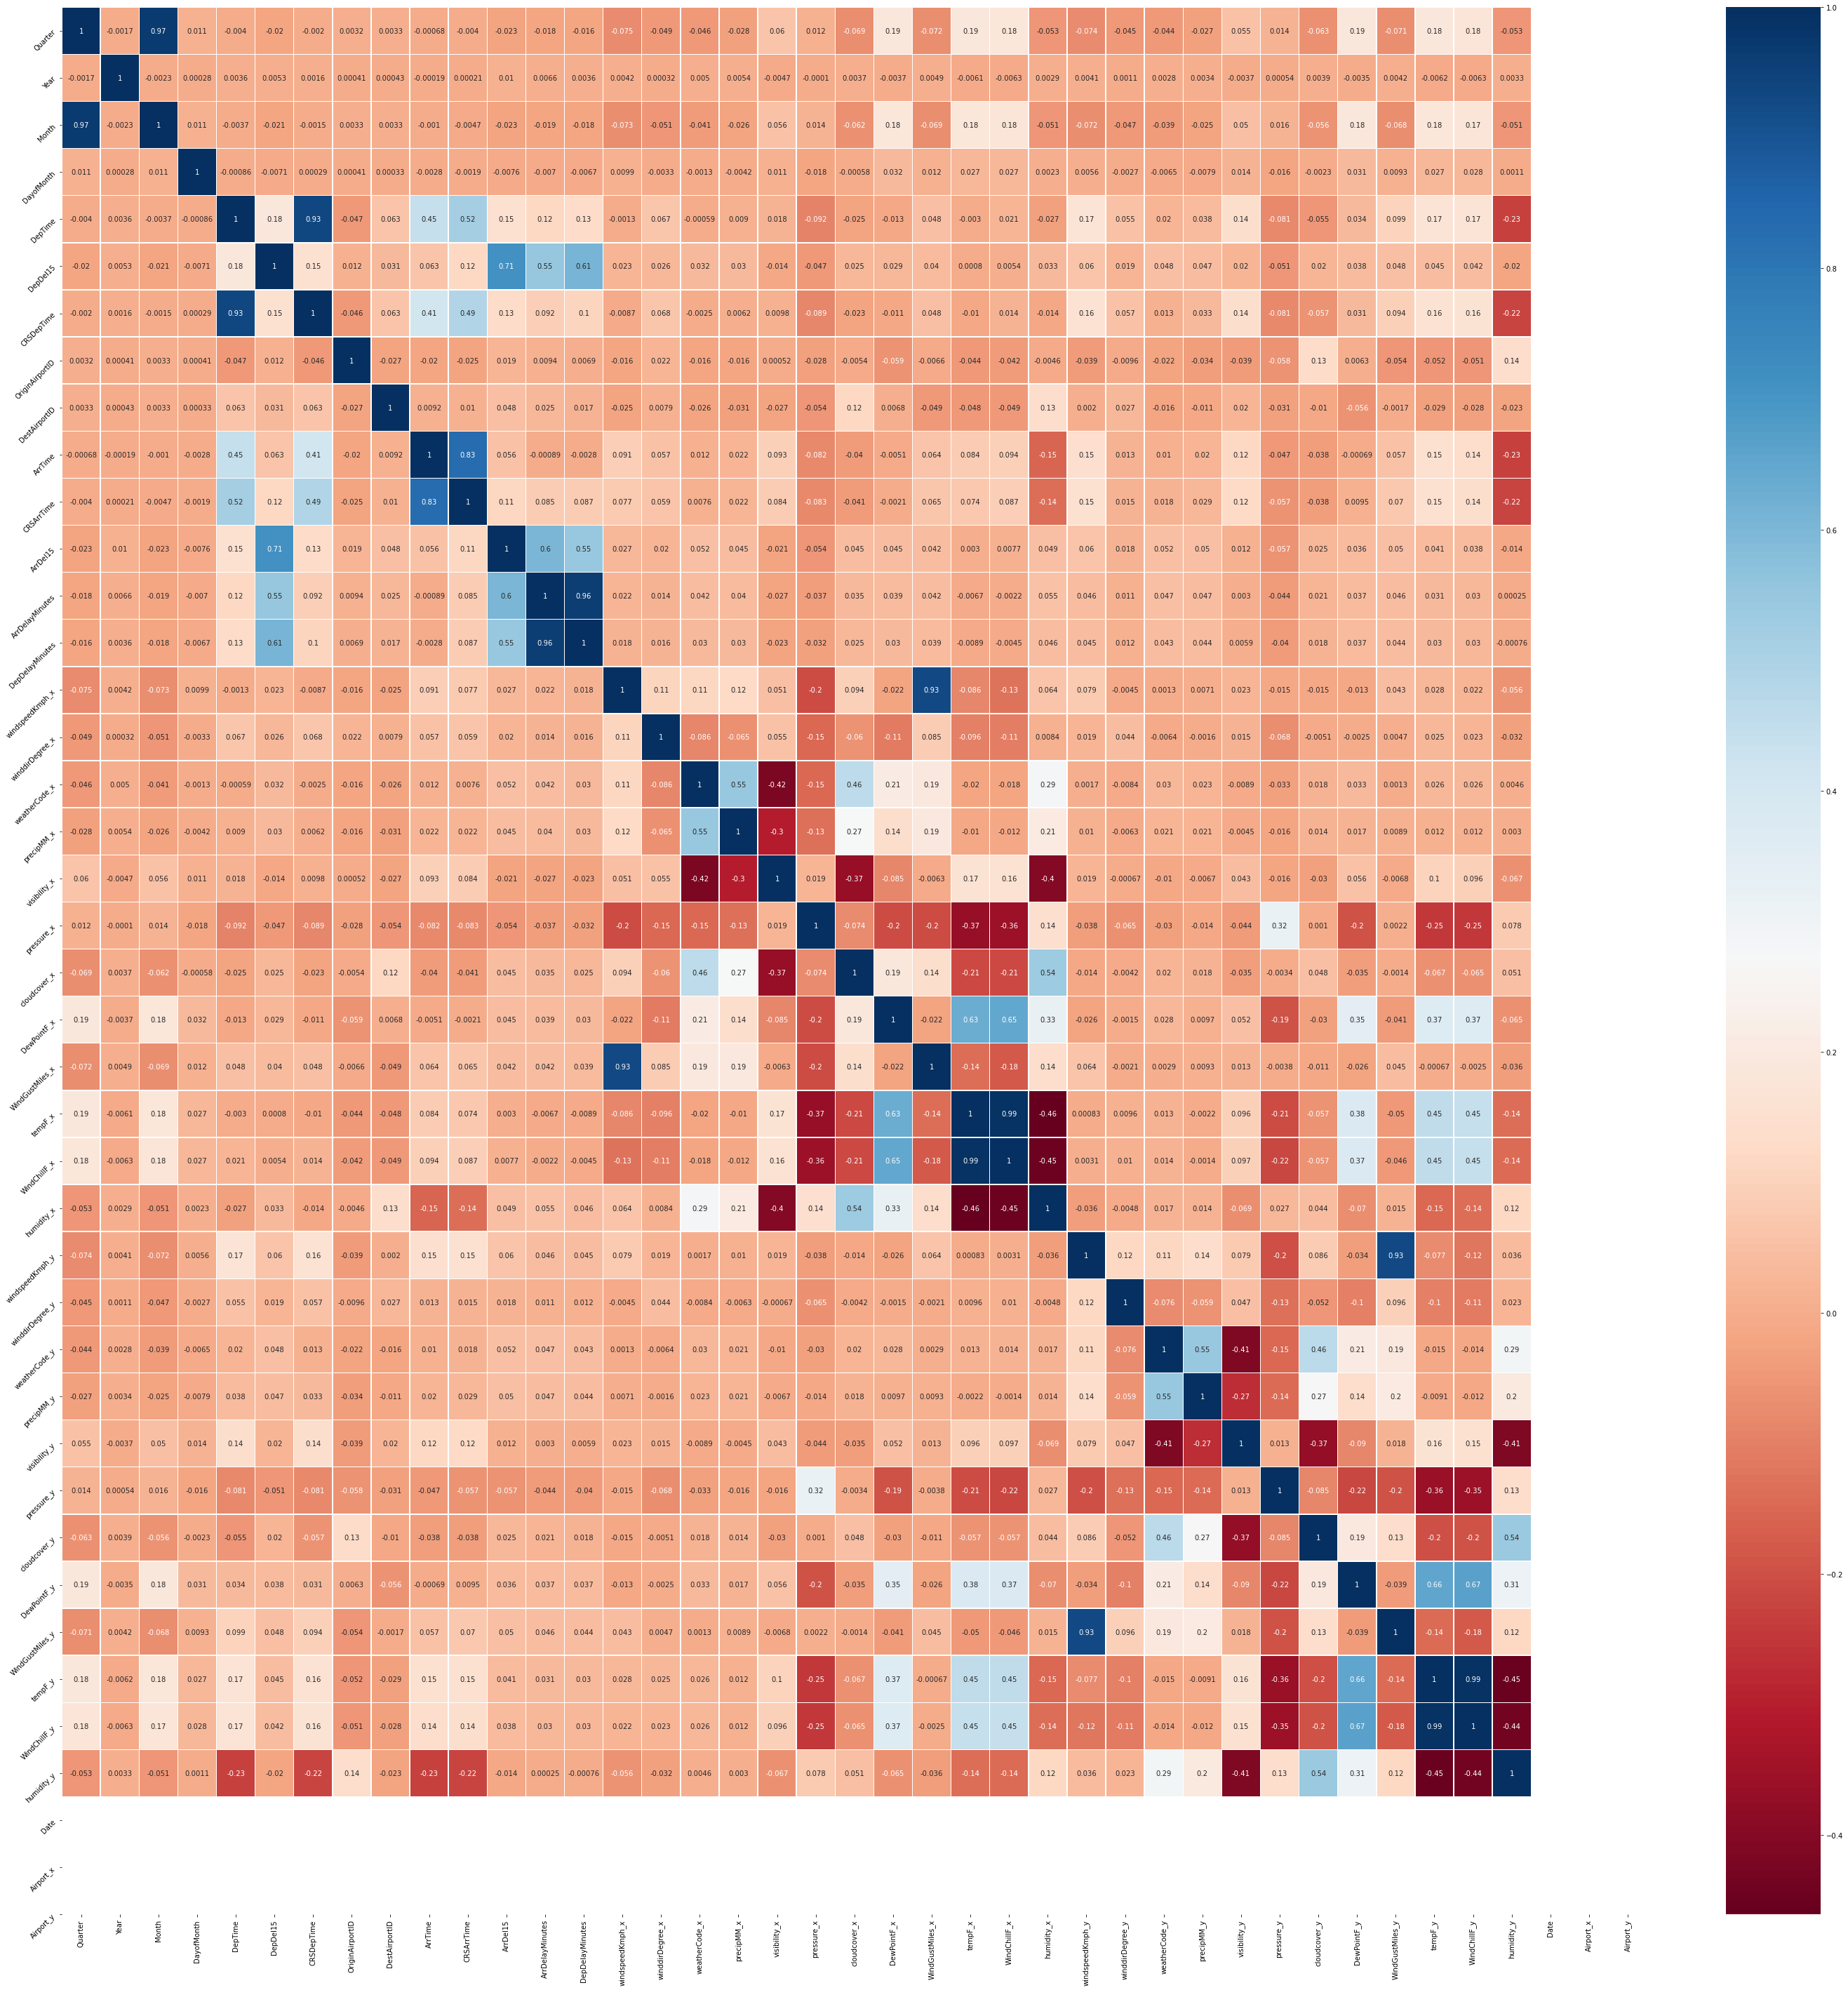

In [14]:
plt.figure(figsize = (50, 50))

sns.heatmap(dt.corr(method = 'pearson'), xticklabels = dt.columns , yticklabels = dt.columns , annot = True, cmap = 'RdBu', linewidths = 0.5)

plt.yticks(rotation = 45) 

plt.show()

In [6]:
#importing data from over sampling
xrov=pd.DataFrame()
yrov=pd.DataFrame()
xrov=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/X_rov.csv")
xrov = xrov.loc[xrov["4"] == 1]
labels_train_ov= np.asarray(xrov["5"])
select_ov = xrov.drop(["5"],axis=1)
features_train_ov = np.asarray(select_ov)

In [ ]:
#importing data from over sampling
xrov=pd.DataFrame()
#yrun=pd.DataFrame()
xrov=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/X_reg_ov.csv")

In [32]:
d=pd.DataFrame(xrov)
d

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1155.000000,3.000000,1.000000,1527.000000,1.0,15.000000,14.000000,12.000000,317.000000,113.000000,...,176.0,1.000000,9.0,1015.000000,30.000000,72.000000,6.000000,85.000000,86.000000,65.000000
9,2005.000000,7.000000,14.000000,2130.000000,1.0,35.000000,10.000000,4.000000,190.000000,122.000000,...,113.0,0.000000,10.0,1011.000000,0.000000,28.000000,3.000000,69.000000,69.000000,25.000000
11,1651.000000,10.000000,9.000000,1802.000000,1.0,74.000000,67.000000,7.000000,216.000000,113.000000,...,113.0,0.000000,10.0,1025.000000,0.000000,38.000000,12.000000,67.000000,65.000000,37.000000
12,915.000000,10.000000,8.000000,1213.000000,1.0,90.000000,126.000000,13.000000,223.000000,119.000000,...,113.0,0.000000,10.0,1016.000000,21.000000,69.000000,14.000000,85.000000,82.000000,65.000000
17,2210.000000,3.000000,11.000000,32.000000,1.0,15.000000,24.000000,4.000000,317.000000,113.000000,...,113.0,0.000000,10.0,1011.000000,0.000000,68.000000,17.000000,85.000000,86.000000,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037819,1321.404665,11.707911,3.988843,1511.314402,1.0,22.449291,17.763693,12.292089,250.977687,113.000000,...,113.0,0.000000,10.0,1018.719067,1.146045,65.606492,7.280933,83.449291,84.595335,51.876268
2037820,1401.277147,4.404272,3.531909,1812.914823,1.0,29.085177,13.659547,10.659547,122.595728,122.000000,...,113.0,0.000000,10.0,1030.744725,0.000000,15.063819,18.382913,39.233917,29.361555,45.574626
2037821,1419.226197,14.000000,12.000000,1619.507944,1.0,18.380958,23.746028,9.000000,227.944451,113.000000,...,119.0,0.071825,10.0,1016.845239,68.746028,50.873014,13.436507,61.154761,57.873014,73.873014
2037822,2155.618772,7.309386,7.690614,35.635380,1.0,28.762455,33.143683,6.436462,155.071842,113.000000,...,353.0,0.812708,10.0,1010.491696,66.762455,64.983393,11.071842,61.657399,61.657399,80.397835


In [33]:
r=d.round(2)

In [34]:
del_ov = r.loc[r["4"] == 1]
del_ov

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1155.00,3.00,1.00,1527.00,1.0,15.00,14.00,12.00,317.00,113.00,...,176.0,1.00,9.0,1015.00,30.00,72.00,6.00,85.00,86.00,65.00
9,2005.00,7.00,14.00,2130.00,1.0,35.00,10.00,4.00,190.00,122.00,...,113.0,0.00,10.0,1011.00,0.00,28.00,3.00,69.00,69.00,25.00
11,1651.00,10.00,9.00,1802.00,1.0,74.00,67.00,7.00,216.00,113.00,...,113.0,0.00,10.0,1025.00,0.00,38.00,12.00,67.00,65.00,37.00
12,915.00,10.00,8.00,1213.00,1.0,90.00,126.00,13.00,223.00,119.00,...,113.0,0.00,10.0,1016.00,21.00,69.00,14.00,85.00,82.00,65.00
17,2210.00,3.00,11.00,32.00,1.0,15.00,24.00,4.00,317.00,113.00,...,113.0,0.00,10.0,1011.00,0.00,68.00,17.00,85.00,86.00,49.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037819,1321.40,11.71,3.99,1511.31,1.0,22.45,17.76,12.29,250.98,113.00,...,113.0,0.00,10.0,1018.72,1.15,65.61,7.28,83.45,84.60,51.88
2037820,1401.28,4.40,3.53,1812.91,1.0,29.09,13.66,10.66,122.60,122.00,...,113.0,0.00,10.0,1030.74,0.00,15.06,18.38,39.23,29.36,45.57
2037821,1419.23,14.00,12.00,1619.51,1.0,18.38,23.75,9.00,227.94,113.00,...,119.0,0.07,10.0,1016.85,68.75,50.87,13.44,61.15,57.87,73.87
2037822,2155.62,7.31,7.69,35.64,1.0,28.76,33.14,6.44,155.07,113.00,...,353.0,0.81,10.0,1010.49,66.76,64.98,11.07,61.66,61.66,80.40


In [35]:
#over sampling train data
labels_train_ov= np.asarray(del_ov["5"])
dt_select_ov = del_ov.drop(["5"],axis=1)
features_train_ov = np.asarray(dt_select_ov)

In [7]:
d_test=pd.DataFrame()
d_test=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/test.csv")
d_test

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,ArrTime,...,pressure_y,cloudcover_y,DewPointF_y,WindGustMiles_y,tempF_y,WindChillF_y,humidity_y,Date,Airport_x,Airport_y
0,2.0,2017.0,6.0,26.0,700.0,0.0,730.0,11618.0,14771.0,1000.0,...,1024.0,7.0,55.0,3.0,69.0,70.0,64.0,2017-06-26,SFO,EWR
1,2.0,2016.0,4.0,25.0,2200.0,0.0,2213.0,12892.0,12478.0,600.0,...,1012.0,0.0,41.0,18.0,61.0,61.0,50.0,2016-04-25,JFK,LAX
2,2.0,2017.0,5.0,10.0,2000.0,0.0,2015.0,12478.0,14771.0,0.0,...,1021.0,97.0,49.0,9.0,55.0,53.0,83.0,2017-05-10,SFO,JFK
3,2.0,2016.0,4.0,29.0,1100.0,0.0,1120.0,12892.0,14107.0,1200.0,...,1016.0,70.0,54.0,8.0,64.0,60.0,79.0,2016-04-29,PHX,LAX
4,4.0,2016.0,10.0,22.0,1500.0,0.0,1545.0,14771.0,14107.0,1800.0,...,1013.0,100.0,52.0,10.0,61.0,61.0,75.0,2016-10-22,PHX,SFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555043,4.0,2017.0,11.0,12.0,500.0,0.0,545.0,11618.0,13204.0,800.0,...,1024.0,0.0,30.0,11.0,40.0,34.0,67.0,2017-11-12,MCO,EWR
555044,4.0,2017.0,10.0,1.0,1000.0,0.0,1015.0,14747.0,14771.0,1200.0,...,1013.0,100.0,46.0,11.0,57.0,54.0,70.0,2017-10-01,SFO,SEA
555045,2.0,2017.0,6.0,2.0,1400.0,0.0,1455.0,14107.0,12889.0,1500.0,...,1011.0,62.0,35.0,8.0,101.0,100.0,11.0,2017-06-02,LAS,PHX
555046,4.0,2017.0,11.0,7.0,900.0,0.0,910.0,13930.0,11618.0,1200.0,...,1027.0,0.0,50.0,8.0,57.0,54.0,82.0,2017-11-07,EWR,ORD


In [8]:
delay_test = d_test.loc[d_test["ArrDel15"] == 1]

In [9]:
dr=pd.DataFrame(delay_test)
dr

,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,ArrTime,...,pressure_y,cloudcover_y,DewPointF_y,WindGustMiles_y,tempF_y,WindChillF_y,humidity_y,Date,Airport_x,Airport_y
17,4.0,2016.0,11.0,2.0,1400.0,0.0,1455.0,13930.0,11292.0,1600.0,...,1019.0,100.0,58.0,12.0,63.0,61.0,91.0,2016-11-02,DEN,ORD
29,1.0,2016.0,1.0,10.0,1400.0,1.0,1321.0,11057.0,13303.0,1600.0,...,1009.0,75.0,39.0,18.0,51.0,45.0,65.0,2016-01-10,MIA,CLT
31,4.0,2016.0,11.0,1.0,1000.0,1.0,820.0,12892.0,12889.0,1100.0,...,1017.0,12.0,56.0,5.0,65.0,64.0,77.0,2016-11-01,LAS,LAX
42,3.0,2016.0,8.0,15.0,2000.0,1.0,1903.0,13930.0,11298.0,2200.0,...,1016.0,100.0,69.0,10.0,68.0,69.0,75.0,2016-08-15,DFW,ORD
46,2.0,2016.0,4.0,24.0,1100.0,1.0,736.0,14747.0,12266.0,1700.0,...,1019.0,99.0,40.0,11.0,51.0,47.0,67.0,2016-04-24,IAH,SEA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555023,4.0,2017.0,10.0,17.0,1200.0,1.0,1145.0,12478.0,14771.0,1500.0,...,1014.0,59.0,60.0,11.0,69.0,68.0,80.0,2017-10-17,SFO,JFK
555024,1.0,2016.0,2.0,24.0,1600.0,0.0,1705.0,13303.0,12266.0,1900.0,...,1014.0,18.0,70.0,19.0,83.0,82.0,69.0,2016-02-24,IAH,MIA
555026,1.0,2017.0,1.0,5.0,1800.0,0.0,1815.0,11292.0,12889.0,1900.0,...,1011.0,17.0,24.0,13.0,31.0,25.0,75.0,2017-01-05,LAS,DEN
555034,4.0,2017.0,10.0,16.0,1700.0,1.0,1725.0,11618.0,13204.0,2000.0,...,1019.0,2.0,55.0,10.0,69.0,69.0,62.0,2017-10-16,MCO,EWR


In [39]:
label_test = np.asarray(dr["ArrDelayMinutes"])
dr_select = dr.drop(["ArrDelayMinutes","Quarter", "Year","ArrTime","DepTime", "Month", "DayofMonth", "DepDel15","Date","Airport_y","Airport_x"],axis=1)
lenc = LabelEncoder()
intenc = lenc.fit_transform(dr_select["DestAirportID"])
dr_select["DestAirportID"] = intenc
intenc = lenc.fit_transform(dr_select["OriginAirportID"])
dr_select["OriginAirportID"] = intenc
feature_test = np.asarray(dr_select)

In [40]:
label_test_un = np.asarray(dr["ArrDelayMinutes"])
dr_select = dr.drop(["ArrDelayMinutes","Quarter", "Year","ArrTime","DepTime", "Month", "DayofMonth", "DepDel15","Date","Airport_y","Airport_x"],axis=1)
lenc = LabelEncoder()
intenc = lenc.fit_transform(dr_select["DestAirportID"])
dr_select["DestAirportID"] = intenc
intenc = lenc.fit_transform(dr_select["OriginAirportID"])
dr_select["OriginAirportID"] = intenc
feature_test_un = np.asarray(dr_select)

In [10]:
label_test_ov = np.asarray(dr["ArrDelayMinutes"])
dr_select = dr.drop(["ArrDelayMinutes","Quarter", "Year","ArrTime","DepTime", "Month", "DayofMonth", "DepDel15","Date","Airport_y","Airport_x"],axis=1)
lenc = LabelEncoder()
intenc = lenc.fit_transform(dr_select["DestAirportID"])
dr_select["DestAirportID"] = intenc
intenc = lenc.fit_transform(dr_select["OriginAirportID"])
dr_select["OriginAirportID"] = intenc
feature_test_ov = np.asarray(dr_select)

## Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
lr = GradientBoostingRegressor()
lr.fit(features_train,labels_train)


GradientBoostingRegressor()

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
lrun = GradientBoostingRegressor()
lrun.fit(features_train_un,labels_train_un)

GradientBoostingRegressor()

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
lrov = GradientBoostingRegressor()
lrov.fit(features_train_ov,labels_train_ov)

GradientBoostingRegressor()

In [ ]:
pred = lr.predict(feature_test)

In [19]:
pred_un = lrun.predict(feature_test_un)

In [43]:
pred_ov = lrov.predict(feature_test_ov)

In [17]:
#without sampling
print("R2 score : %.2f" % r2_score(label_test,pred))
print("Mean squared error: %.2f" % mean_squared_error(label_test,pred))
print("Root mean squared error: %.2f" %mean_squared_error(label_test,pred)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test, pred))

R2 score : 0.95
Mean squared error: 287.76
Root mean squared error: 16.96
Mean absolute error: 11.76


In [20]:
#with under sampling
print("R2 score : %.2f" % r2_score(label_test_un,pred_un))
print("Mean squared error: %.2f" % mean_squared_error(label_test_un,pred_un))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_un,pred_un)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_un, pred_un))

R2 score : 0.95
Mean squared error: 287.77
Root mean squared error: 16.96
Mean absolute error: 11.76


In [44]:
#with over sampling
print("R2 score : %.2f" % r2_score(label_test_ov,pred_ov))
print("Mean squared error: %.2f" % mean_squared_error(label_test_ov,pred_ov))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_ov,pred_ov)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_ov, pred_ov))

R2 score : 0.95
Mean squared error: 288.38
Root mean squared error: 16.98
Mean absolute error: 11.78


## XGBoost

In [25]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(features_train,labels_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
from xgboost import XGBRegressor
xgn = XGBRegressor()
xgn.fit(features_train_un,labels_train_un)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
from xgboost import XGBRegressor
xgov = XGBRegressor()
xgov.fit(features_train_ov,labels_train_ov)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
xgr = xg.predict(feature_test)

In [29]:
xgr_un = xgn.predict(feature_test_un)

In [17]:
xgr_ov = xgov.predict(feature_test_ov)

In [27]:
print("R2 score : %.2f" % r2_score(label_test,xgr))
print("Mean squared error: %.2f" % mean_squared_error(label_test,xgr))
print("Root mean squared error: %.2f" %mean_squared_error(label_test,xgr)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test, xgr))

R2 score : 0.95
Mean squared error: 269.48
Root mean squared error: 16.42
Mean absolute error: 11.42


In [30]:
print("R2 score : %.2f" % r2_score(label_test_un,xgr_un))
print("Mean squared error: %.2f" % mean_squared_error(label_test_un,xgr_un))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_un,xgr_un)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_un, xgr_un))

R2 score : 0.95
Mean squared error: 269.48
Root mean squared error: 16.42
Mean absolute error: 11.42


In [18]:
print("R2 score : %.2f" % r2_score(label_test_ov,xgr_ov))
print("Mean squared error: %.2f" % mean_squared_error(label_test_ov,xgr_ov))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_ov,xgr_ov)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_ov, xgr_ov))

R2 score : 0.95
Mean squared error: 270.31
Root mean squared error: 16.44
Mean absolute error: 11.47


In [19]:
l=np.array([label_test_ov,xgr_ov])
data=pd.DataFrame(l)
d1=data.T
d1=d1.rename(columns={0:"True_Value",1:"Predicted_Value"})
r=d1.round(1)
r.to_csv("Analize.csv")

In [20]:
b1=r[(r["True_Value"]>15) & (r["True_Value"]<100)]
b1

,True_Value,Predicted_Value
1,50.0,52.7
2,90.0,101.7
3,76.0,72.9
6,27.0,22.8
7,24.0,27.7
...,...,...
115904,23.0,26.0
115905,23.0,22.4
115906,23.0,53.9
115907,21.0,29.9


In [21]:
print("Root mean squared error: %.2f" %mean_squared_error(b1["True_Value"],b1["Predicted_Value"])**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(b1["True_Value"],b1["Predicted_Value"]))

Root mean squared error: 13.56
Mean absolute error: 10.14


In [22]:
b2=r[(r["True_Value"]>100) & (r["True_Value"]<200)]
b2

,True_Value,Predicted_Value
5,135.0,152.4
12,112.0,92.4
20,116.0,87.2
25,130.0,94.3
30,177.0,181.6
...,...,...
115877,114.0,102.6
115879,106.0,102.4
115899,136.0,123.1
115903,118.0,103.5


In [23]:
print("Root mean squared error: %.2f" %mean_squared_error(b2["True_Value"],b2["Predicted_Value"])**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(b2["True_Value"],b2["Predicted_Value"]))

Root mean squared error: 25.97
Mean absolute error: 17.41


In [24]:
b3=r[(r["True_Value"]>200) & (r["True_Value"]<500)]
b3

,True_Value,Predicted_Value
4,207.0,218.5
37,240.0,235.2
59,298.0,328.9
79,359.0,316.8
83,493.0,473.9
...,...,...
115822,219.0,167.5
115838,255.0,226.2
115892,209.0,197.3
115894,224.0,235.4


In [25]:
print("Root mean squared error: %.2f" %mean_squared_error(b3["True_Value"],b3["Predicted_Value"])**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(b3["True_Value"],b3["Predicted_Value"]))

Root mean squared error: 28.65
Mean absolute error: 18.25


In [26]:
b4=r[(r["True_Value"]>500) & (r["True_Value"]<1000)]
b4

,True_Value,Predicted_Value
270,611.0,628.5
333,508.0,516.6
798,897.0,879.2
1004,847.0,838.8
1262,802.0,794.0
...,...,...
112033,504.0,535.2
112436,722.0,750.8
112659,714.0,730.0
114025,532.0,492.1


In [27]:
print("Root mean squared error: %.2f" %mean_squared_error(b4["True_Value"],b4["Predicted_Value"])**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(b4["True_Value"],b4["Predicted_Value"]))

Root mean squared error: 22.24
Mean absolute error: 16.05


In [28]:
b5=r[r["True_Value"]>1000]
b5

,True_Value,Predicted_Value
578,1049.0,1031.5
3698,1166.0,1196.1
4783,1079.0,1096.7
7735,1208.0,1252.2
7833,1027.0,1020.4
8802,1120.0,1125.4
9122,1203.0,1206.9
10095,1010.0,1033.4
10488,1351.0,1374.7
11828,1184.0,1187.7


In [32]:
len(b5)

58

In [29]:
print("Root mean squared error: %.2f" %mean_squared_error(b5["True_Value"],b5["Predicted_Value"])**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(b5["True_Value"],b5["Predicted_Value"]))

Root mean squared error: 26.65
Mean absolute error: 19.76


In [30]:
d1=pd.DataFrame(label_test_ov)
d1=d1.rename(columns={0:"True_Value"})
d1

,True_Value
0,15.0
1,50.0
2,90.0
3,76.0
4,207.0
...,...
115906,23.0
115907,21.0
115908,15.0
115909,31.0


In [31]:
d2=pd.DataFrame(xgr_ov)
d2=d2.rename(columns={0:"Predicted_Value"})
d2

,Predicted_Value
0,26.986000
1,52.678509
2,101.713417
3,72.909760
4,218.543762
...,...
115906,53.893562
115907,29.926481
115908,24.676849
115909,26.087982


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(features_train, labels_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor_un = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_un.fit(features_train_un, labels_train_un)

RandomForestRegressor(n_estimators=10, random_state=0)

In [48]:
from sklearn.ensemble import RandomForestRegressor
regressor_ov = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_ov.fit(features_train_ov, labels_train_ov)

RandomForestRegressor(n_estimators=10, random_state=0)

In [35]:
reg = regressor.predict(feature_test)

In [38]:
reg_un = regressor.predict(feature_test_un)

In [49]:
reg_ov = regressor_ov.predict(feature_test_ov)

In [36]:
print("R2 score : %.2f" % r2_score(label_test,reg))
print("Mean squared error: %.2f" % mean_squared_error(label_test,reg))
print("Root mean squared error: %.2f" %mean_squared_error(label_test,reg)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test, reg))

R2 score : 0.94
Mean squared error: 314.96
Root mean squared error: 17.75
Mean absolute error: 12.59


In [39]:
print("R2 score : %.2f" % r2_score(label_test_un,reg_un))
print("Mean squared error: %.2f" % mean_squared_error(label_test_un,reg_un))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_un,reg_un)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_un, reg_un))

R2 score : 0.94
Mean squared error: 314.96
Root mean squared error: 17.75
Mean absolute error: 12.59


In [50]:
print("R2 score : %.2f" % r2_score(label_test_ov,reg_ov))
print("Mean squared error: %.2f" % mean_squared_error(label_test_ov,reg_ov))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_ov,reg_ov)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_ov, reg_ov))

R2 score : 0.94
Mean squared error: 309.68
Root mean squared error: 17.60
Mean absolute error: 12.52


## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
regressor_d = DecisionTreeRegressor(random_state = 0)
regressor_d.fit(features_train, labels_train)

DecisionTreeRegressor(random_state=0)

In [46]:
from sklearn.tree import DecisionTreeRegressor
regressor_dun = DecisionTreeRegressor(random_state = 0)
regressor_dun.fit(features_train_un, labels_train_un)

DecisionTreeRegressor(random_state=0)

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtov = DecisionTreeRegressor(random_state = 0)
dtov.fit(features_train_ov, labels_train_ov)

DecisionTreeRegressor(random_state=0)

In [44]:
deg = regressor_d.predict(feature_test)

In [47]:
deg_un = regressor_dun.predict(feature_test_un)

In [55]:
deg_ov = dtov.predict(feature_test_ov)

In [45]:
print("R2 score : %.2f" % r2_score(label_test,deg))
print("Mean squared error: %.2f" % mean_squared_error(label_test,deg))
print("Root mean squared error: %.2f" %mean_squared_error(label_test,deg)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test, deg))

R2 score : 0.89
Mean squared error: 596.40
Root mean squared error: 24.42
Mean absolute error: 16.77


In [48]:
print("R2 score : %.2f" % r2_score(label_test_un,deg_un))
print("Mean squared error: %.2f" % mean_squared_error(label_test_un,deg_un))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_un,deg_un)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_un, deg_un))

R2 score : 0.89
Mean squared error: 596.40
Root mean squared error: 24.42
Mean absolute error: 16.77


In [56]:
print("R2 score : %.2f" % r2_score(label_test_ov,deg_ov))
print("Mean squared error: %.2f" % mean_squared_error(label_test_ov,deg_ov))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_ov,deg_ov)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_ov, deg_ov))

R2 score : 0.90
Mean squared error: 550.96
Root mean squared error: 23.47
Mean absolute error: 16.14


# Pipeling

In [ ]:
cf=pd.DataFrame()
cf=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/xg_classifi.csv")
cf

In [57]:
cf=pd.DataFrame()
cf=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/RF_classifi.csv")
cf

,rf_pred,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,...,pressure_y,cloudcover_y,DewPointF_y,WindGustMiles_y,tempF_y,WindChillF_y,humidity_y,Date,Airport_x,Airport_y
0,0.0,2.0,2017.0,6.0,26.0,700.0,0.0,730.0,11618.0,14771.0,...,1024.0,7.0,55.0,3.0,69.0,70.0,64.0,2017-06-26,SFO,EWR
1,0.0,2.0,2016.0,4.0,25.0,2200.0,0.0,2213.0,12892.0,12478.0,...,1012.0,0.0,41.0,18.0,61.0,61.0,50.0,2016-04-25,JFK,LAX
2,0.0,2.0,2017.0,5.0,10.0,2000.0,0.0,2015.0,12478.0,14771.0,...,1021.0,97.0,49.0,9.0,55.0,53.0,83.0,2017-05-10,SFO,JFK
3,0.0,2.0,2016.0,4.0,29.0,1100.0,0.0,1120.0,12892.0,14107.0,...,1016.0,70.0,54.0,8.0,64.0,60.0,79.0,2016-04-29,PHX,LAX
4,0.0,4.0,2016.0,10.0,22.0,1500.0,0.0,1545.0,14771.0,14107.0,...,1013.0,100.0,52.0,10.0,61.0,61.0,75.0,2016-10-22,PHX,SFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555043,0.0,4.0,2017.0,11.0,12.0,500.0,0.0,545.0,11618.0,13204.0,...,1024.0,0.0,30.0,11.0,40.0,34.0,67.0,2017-11-12,MCO,EWR
555044,0.0,4.0,2017.0,10.0,1.0,1000.0,0.0,1015.0,14747.0,14771.0,...,1013.0,100.0,46.0,11.0,57.0,54.0,70.0,2017-10-01,SFO,SEA
555045,0.0,2.0,2017.0,6.0,2.0,1400.0,0.0,1455.0,14107.0,12889.0,...,1011.0,62.0,35.0,8.0,101.0,100.0,11.0,2017-06-02,LAS,PHX
555046,0.0,4.0,2017.0,11.0,7.0,900.0,0.0,910.0,13930.0,11618.0,...,1027.0,0.0,50.0,8.0,57.0,54.0,82.0,2017-11-07,EWR,ORD


In [2]:
cf=pd.DataFrame()
cf=pd.read_csv("/Users/msml/Vamsi/SF/SF_Projects/RF_classifi_ov.csv")
cf

,rf_pred_ov,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,...,pressure_y,cloudcover_y,DewPointF_y,WindGustMiles_y,tempF_y,WindChillF_y,humidity_y,Date,Airport_x,Airport_y
0,0.0,2.0,2017.0,6.0,26.0,700.0,0.0,730.0,11618.0,14771.0,...,1024.0,7.0,55.0,3.0,69.0,70.0,64.0,2017-06-26,SFO,EWR
1,0.0,2.0,2016.0,4.0,25.0,2200.0,0.0,2213.0,12892.0,12478.0,...,1012.0,0.0,41.0,18.0,61.0,61.0,50.0,2016-04-25,JFK,LAX
2,0.0,2.0,2017.0,5.0,10.0,2000.0,0.0,2015.0,12478.0,14771.0,...,1021.0,97.0,49.0,9.0,55.0,53.0,83.0,2017-05-10,SFO,JFK
3,0.0,2.0,2016.0,4.0,29.0,1100.0,0.0,1120.0,12892.0,14107.0,...,1016.0,70.0,54.0,8.0,64.0,60.0,79.0,2016-04-29,PHX,LAX
4,0.0,4.0,2016.0,10.0,22.0,1500.0,0.0,1545.0,14771.0,14107.0,...,1013.0,100.0,52.0,10.0,61.0,61.0,75.0,2016-10-22,PHX,SFO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555043,0.0,4.0,2017.0,11.0,12.0,500.0,0.0,545.0,11618.0,13204.0,...,1024.0,0.0,30.0,11.0,40.0,34.0,67.0,2017-11-12,MCO,EWR
555044,0.0,4.0,2017.0,10.0,1.0,1000.0,0.0,1015.0,14747.0,14771.0,...,1013.0,100.0,46.0,11.0,57.0,54.0,70.0,2017-10-01,SFO,SEA
555045,0.0,2.0,2017.0,6.0,2.0,1400.0,0.0,1455.0,14107.0,12889.0,...,1011.0,62.0,35.0,8.0,101.0,100.0,11.0,2017-06-02,LAS,PHX
555046,0.0,4.0,2017.0,11.0,7.0,900.0,0.0,910.0,13930.0,11618.0,...,1027.0,0.0,50.0,8.0,57.0,54.0,82.0,2017-11-07,EWR,ORD


In [3]:
c = cf.loc[cf["rf_pred_ov"] == 1] 
c

,rf_pred_ov,Quarter,Year,Month,DayofMonth,DepTime,DepDel15,CRSDepTime,OriginAirportID,DestAirportID,...,pressure_y,cloudcover_y,DewPointF_y,WindGustMiles_y,tempF_y,WindChillF_y,humidity_y,Date,Airport_x,Airport_y
6,1.0,1.0,2016.0,2.0,13.0,1500.0,1.0,1520.0,11298.0,13930.0,...,1028.0,33.0,37.0,12.0,60.0,60.0,49.0,2016-02-13,ORD,DFW
9,1.0,1.0,2016.0,3.0,11.0,1700.0,1.0,1715.0,13930.0,14771.0,...,1028.0,14.0,41.0,6.0,50.0,47.0,75.0,2016-03-11,SFO,ORD
13,1.0,3.0,2017.0,8.0,6.0,1800.0,0.0,1812.0,11057.0,13303.0,...,1009.0,6.0,70.0,8.0,88.0,90.0,44.0,2017-08-06,MIA,CLT
14,1.0,3.0,2016.0,9.0,17.0,1300.0,1.0,1340.0,14747.0,11298.0,...,1014.0,100.0,59.0,14.0,64.0,64.0,84.0,2016-09-17,DFW,SEA
29,1.0,1.0,2016.0,1.0,10.0,1400.0,1.0,1321.0,11057.0,13303.0,...,1009.0,75.0,39.0,18.0,51.0,45.0,65.0,2016-01-10,MIA,CLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555005,1.0,4.0,2016.0,12.0,11.0,100.0,1.0,2359.0,14107.0,12478.0,...,1017.0,68.0,40.0,7.0,60.0,60.0,47.0,2016-12-11,JFK,PHX
555013,1.0,4.0,2017.0,11.0,23.0,1800.0,0.0,1850.0,11298.0,12892.0,...,1021.0,0.0,46.0,10.0,64.0,63.0,51.0,2017-11-23,LAX,DFW
555023,1.0,4.0,2017.0,10.0,17.0,1200.0,1.0,1145.0,12478.0,14771.0,...,1014.0,59.0,60.0,11.0,69.0,68.0,80.0,2017-10-17,SFO,JFK
555034,1.0,4.0,2017.0,10.0,16.0,1700.0,1.0,1725.0,11618.0,13204.0,...,1019.0,2.0,55.0,10.0,69.0,69.0,62.0,2017-10-16,MCO,EWR


In [12]:
label_test_pipe = np.asarray(c["ArrDelayMinutes"])
c_select = c.drop(["ArrDelayMinutes","Quarter","rf_pred_ov", "Year","ArrTime","DepTime", "Month", "DayofMonth", "DepDel15","Date","Airport_y","Airport_x"],axis=1)
lenc = LabelEncoder()
intenc = lenc.fit_transform(c_select["DestAirportID"])
c_select["DestAirportID"] = intenc
intenc = lenc.fit_transform(c_select["OriginAirportID"])
c_select["OriginAirportID"] = intenc
feature_test_pipe = np.asarray(c_select)

In [13]:
#As XGboost over sampling has the best score we take it to test the pipeline
xgr_pipe = xgov.predict(feature_test_pipe)

In [ ]:
xgr_pipe = xgov.predict(feature_test_pipe)

In [ ]:
print("R2 score : %.2f" % r2_score(label_test_pipe,xgr_pipe))
print("Mean squared error: %.2f" % mean_squared_error(label_test_pipe,xgr_pipe))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_pipe,xgr_pipe)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_pipe, xgr_pipe))

In [14]:
print("R2 score : %.2f" % r2_score(label_test_pipe,xgr_pipe))
print("Mean squared error: %.2f" % mean_squared_error(label_test_pipe,xgr_pipe))
print("Root mean squared error: %.2f" %mean_squared_error(label_test_pipe,xgr_pipe)**0.5)
print("Mean absolute error: %.2f" % mean_absolute_error(label_test_pipe, xgr_pipe))

R2 score : 0.94
Mean squared error: 344.50
Root mean squared error: 18.56
Mean absolute error: 14.15
